# Introduction to time series analysis

<img src="media/cover.png" style="width: 40%; display: block; margin: auto;">

## Introduction

In this lecture we will cover the following topics:

- Definition of time series data.
- Introduction to time series analysis and application examples.
- The main components of a time series.
- Time series decomposition.

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(0)  # for reproducibility

---

## Basics

### What is a time series?

- A time series is a sequence of data points organized in time order.
- Usually, the time signal is sampled at equally spaced points in time.
- These can be represented as the sequence of the sampled values.
- We refer to this setting as *discrete* time.

<img src="media/ts_equal.png" style="width: 50%; display: block; margin: auto;">

- Irregularly sampled time signals can still be represented as a time series.
- It is necessary to encode this additional information into an additional data structure.
- We refer to this setting as *continuous* time.

<img src="media/ts_unequal.png" style="width: 50%; display: block; margin: auto;">

- This setting is less common. We focus on discrete time.

### What data are represented as time series?

- Time series are found in a myriad of natural phenomena, industrial and engineering applications, business, human activities, and so on.

<img src="media/passengers.png" style="width: 70%; display: block; margin: auto;">

<img src="media/co2.png" style="width: 70%; display: block; margin: auto;">

<img src="media/sunspots.png" style="width: 70%; display: block; margin: auto;">

<img src="media/electricity.png" style="width: 70%; display: block; margin: auto;">

<img src="media/water_temps.png" style="width: 70%; display: block; margin: auto;">

- Other examples include data from:
    - Finance: stock prices, asset prices, macroeconomic factors.
    - E-Commerce: page views, new users, searches.
    - Business: transactions, revenue, inventory levels.
    - Natural language: machine translation, chatbots.

### Time series analysis

The main pruposes of time series analysis are:
1. To **understand** and characterize the underlying process that generates the observed data.
2. To **forecast** the evolution of the process, i.e., predict the next observed values.

- There are two main different perspectives to look at a time series.
- Each perspective leads to different time series analysis approaches

#### Statistics perspective

- A time series is a sequence of *random variables* that have some correlation or other distributional relationship between them. 

<img src="media/random_var.png" style="width: 40%; display: block; margin: auto;">

- The sequence is a realization (observed values) of a stochastic process.
- Statistical time series approaches focus on finding the parameters of the stochastic process that most likely produced the observed time series.

#### Dynamical system perspective

- This perspective assumes that there is a system governed by unknown variables $\{x_1, x_2, x_3, \dots ,x_𝑁\}$.
- Generally, we only observe one time series $y$ generated by the system.
- What can $y$ be?
    - One of the system variables.
    - A function $f$ of system variables.
- The objective of the analysis is to reconstruct the dynamics of the entire system from $y$.

<img src="media/partial.png" style="width: 40%; display: block; margin: auto;">

### Applications

Time series analysis is applied in many real world applications, including
- Economic forecasting
- Stock market analysis
- Demand planning and forecasting
- Anomaly detection
- … And much more

**Economic Forecasting**

- Time series analysis is used in macroeconomic predictions.
- World Trade Organization does time series forecasting to predict levels of international trade [[source](https://www.econ-jobs.com/research/36056-Forecasting-international-trade-A-time-series-approach.pdf)].
- Federal Reserve uses time series forecasts of the economy to set interest rates [[source](https://www.federalreserve.gov/pubs/feds/2009/200910/200910pap.pdf)].

<img src="media/economic.png" style="width: 50%; display: block; margin: auto;">

**Demand forecasting**

- Time series analysis is used to predict demand at different levels of granularity.
- Amazon and other e commerce companies use time series modeling to predict demand at a product geography level [[source](https://www.theverge.com/2014/1/18/5320636/amazon-plans-to-ship-your-packages-before-you-even-buy-them)].
- Helps meet customer needs (fast shipping) and reduce inventory waste

<img src="media/ecommerce.png" style="width: 50%; display: block; margin: auto;">

**Anomaly detection**

- Used to detect anomalous behaviors in the underlying system by looking at unusual patterns in the time series.
- Widely used in manufacturing to detect defects and target preventive maintenance [[source](https://papers.phmsociety.org/index.php/phme/article/view/1256/phmec_20_1256)].
- With new IoT devices, anomaly detection is being used in machinery heavy industries, such as petroleum and gas [[source](https://arxiv.org/abs/1607.02480)].

<img src="media/anomaly.png" style="width: 50%; display: block; margin: auto;">

---

## Time series components

- A time series is often assumed to be composed of three components:
    - *Trend*: the long-term direction.
    - *Seasonality*: the periodic behavior.
    - *Residuals*: the irregular fluctuations.

### Trend

- Trend captures the general direction of the time series.
- For example, increasing number of passengers over the years despite seasonal fluctuations.
- Trend can be increasing, decreasing, or constant.
- It can increase/decrease in different ways over time (linearly, exponentially, etc…).

<img src="media/passengers_trend.png" style="width: 70%; display: block; margin: auto;">

- Let's create a trend from scratch to understand how it looks like.

In [3]:
time = np.arange(144)
trend = time * 2.65 +100

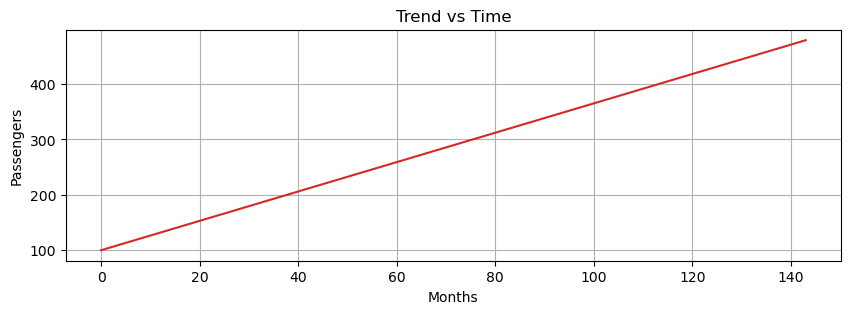

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, trend, color='tab:red')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Trend vs Time");

### Seasonality

- Periodic fluctuations in time series data that occur at regular intervals due to seasonal factors.
- It is characterized by consistent and predictable patterns over a specific period (e.g., daily, monthly, quarterly, yearly).

It can be driven by many factors.
- Naturally occurring events such as weather fluctuations caused by time of year.
- Business or administrative procedures, such as start and end of a school year.
- Social or cultural behavior, e.g., holidays or religious observances.

- Let's generate the seasonal component.

In [5]:
seasonal = 20 + np.sin( time * 0.5) * 20

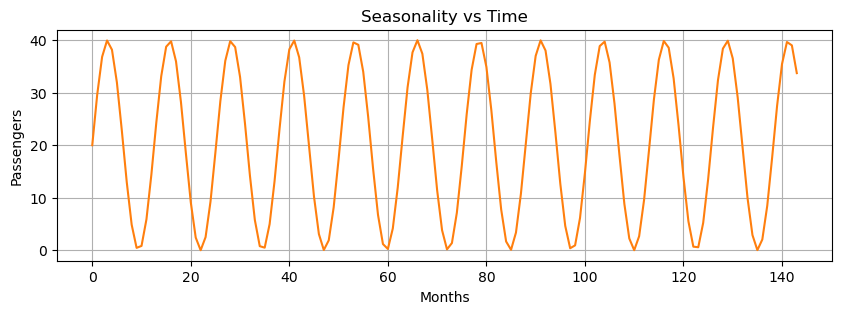

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, seasonal, color='tab:orange')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Seasonality vs Time");

### Residuals

- Residuals are the random fluctuations left over after trend and seasonality are removed from the original time series.
- One should not see a trend or seasonal pattern in the residuals.
- They represent short term, rather unpredictable fluctuations.

In [7]:
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

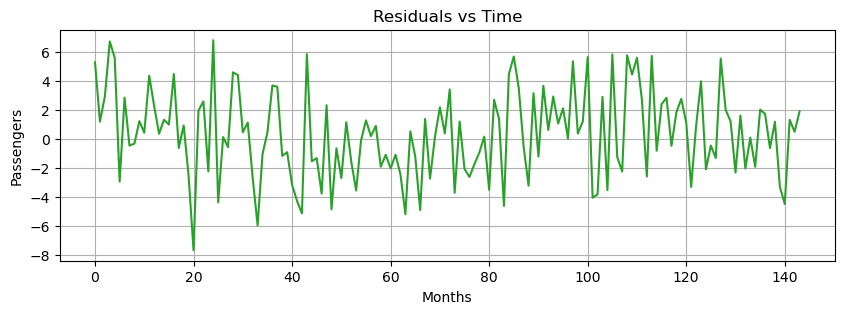

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, residuals, color='tab:green')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Residuals vs Time");

---

## Decomposition Models

- Time series components can be decomposed with the following models:
    1. Additive decomposition
    2. Multiplicative decomposition
    3. Pseudoadditive decomposition

### Additive model

- Additive models assume that the observed time series is the sum of its components: 

$$X(t) = T(t) + S(t) + R(t)$$  

- where
    - $X(t)$ is the time series   
    - $T(t)$ is the trend  
    - $S(t)$ is the seasonality  
    - $R(t)$ is the residual  
- Additive models are used when the magnitudes of the seasonal and residual values do not depend on the level of the trend.

In [9]:
additive = trend + seasonal + residuals

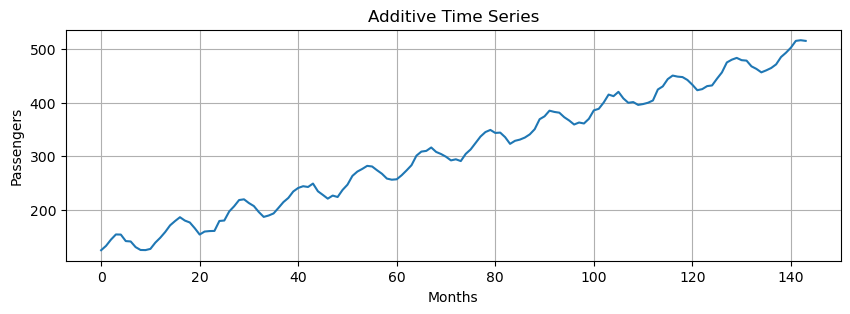

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, additive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Additive Time Series")
plt.grid();

### Multiplicative Model

- Assumes that the observed time series is the product of its components: 

$$X(t) = T(t) \cdot S(t) \cdot R(t)$$

- It is possible to transform a multiplicative model to an additive one by applying a log transformation: 

$$\log \left( T(t) \cdot S(t) \cdot R(t) \right) = \log(T(t)) + \log(S(t)) + \log(R(t))$$

- Multiplicative models are used when the magnitudes of seasonal and residual values depends on trend.

In [11]:
multiplicative = trend * seasonal # we do not include residuals to make the pattern more clear

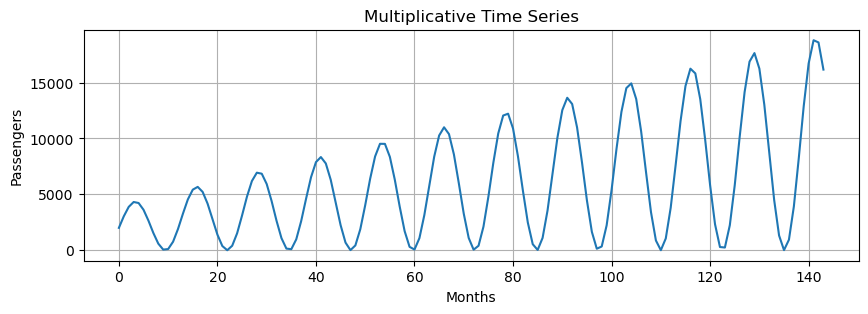

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, multiplicative, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Multiplicative Time Series")
plt.grid();

### Pseudoadditive Model

- Pseudoadditive models combine elements of the additive and multiplicative models.
- Useful when:
    - Time series values are close to or equal to zero. Multiplicative models struggle with zero values, but you still need to model multiplicative seasonality.
    - Some features are multiplicative (e.g., seasonal effects) and other are additive (e.g., residuals).
    - Complex seasonal patterns or data that do not completely align with additive or multiplicative model.

- For example, this model is particularly relevant for modeling series that:
    - are extremely weather-dependent,
    - have sharply pronounced seasonal fluctuations and trend-cycle movements.
- Formulation: 

$$X(t) = T(t) + T(t)\cdot(S(t) - 1) + T(t)\cdot(R(t) - 1) = T(t)\cdot(S(t) + R(t) -1)$$

In [13]:
pseudoadditive = trend * (seasonal + residuals - 1)

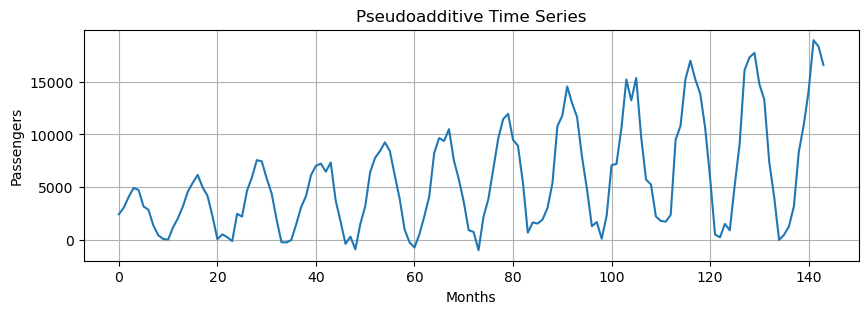

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, pseudoadditive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Pseudoadditive Time Series")
plt.grid();

---

## Time Series Decomposition

- Now let's reverse directions. 
- We have additive and multiplicative data. 
- Let's decompose them into their three components. 

- A very simple, yet often useful, approach is to estimate a *linear* trend.
- A *detrended* time series is obtained by subtracting the linear trend from the data.
- The linear trend is computed as a 1st order polynomial.

In [15]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient
trend = np.arange(len(additive)) * slope + intercept # linear trend
detrended = additive - trend # remove the trend

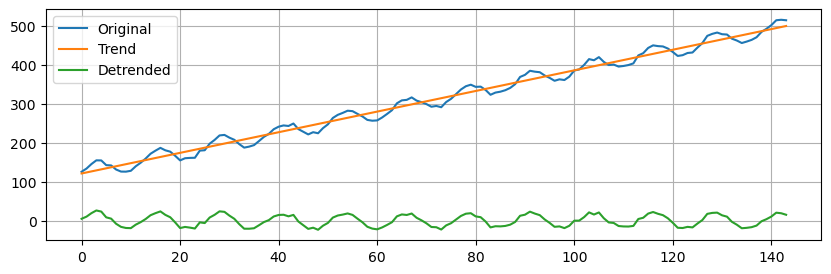

In [16]:
plt.figure(figsize=(10, 3))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

- Next, we will use `seasonal_decompose` (more information [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)) to isolate the main time series components.
- This is a simple method that requires us to specify the type of model (additive or multiplicative) and the main period.

### Additive Decomposition

- We need to specify an integer that represents the main seasonality of the data.
- By looking at the seasonal component, we see that the period is *approximately* $12$ time steps long.
- So, we set `period=12`.

In [17]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)

In [18]:
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

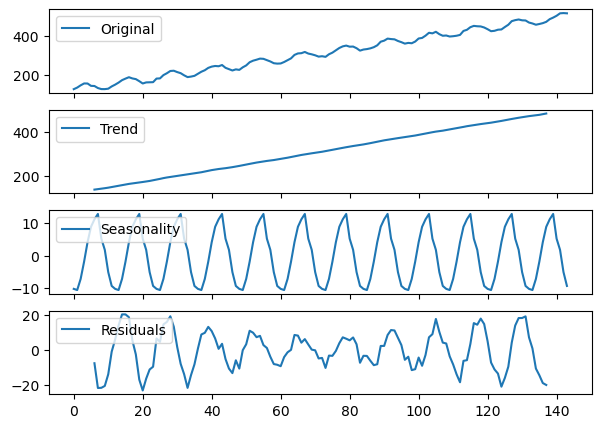

In [19]:
seas_decomp_plots(additive, additive_decomposition)

- The blue line in each plot representes the decomposition. 
- There is a legend in the upper left corner of each plot to let you know what each plot represents. 
- You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close. 

- You may notice both *trend* and *residuals* are missing data towards the beginning and end. 
- This has to do with how trend is calculated (beyond the scope of this lesson). 
- The residuals are missing simply because $R_{t} = Y_{t} - T_{t} - S_{t}$, so missing trend values mean missing residual values as well. 
- In other words, there is nothing wrong with these graphs. 

### Multiplicative Decomposition

- We use the same function as before, but on the `multiplicative` time series.
- Since we know this is a multiplicative time series, we declare `model='multiplicative'` in `seasonal_decompose`.

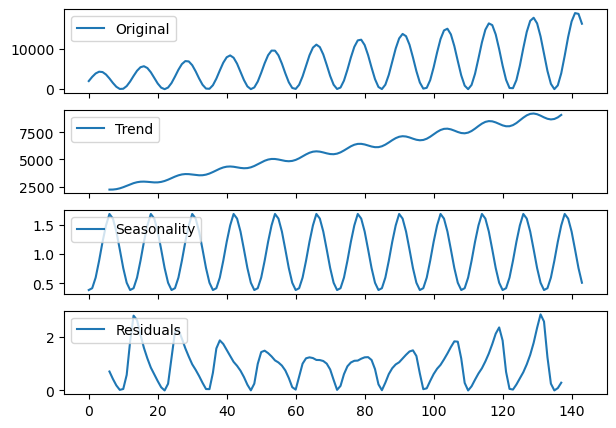

In [20]:
multiplicative_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', 
                                                  period=12)
seas_decomp_plots(multiplicative, multiplicative_decomposition)

- Again, the decomposition does a relatively good job picking up the overall trend and seasonality.
- We can see the shapes follow the patterns we expect. 

### Locally estimated scatterplot smoothing (LOESS)
- Next, we try a second method called `STL` (Seasonal and Trend decomposition using LOESS).
- We start with the additive model.

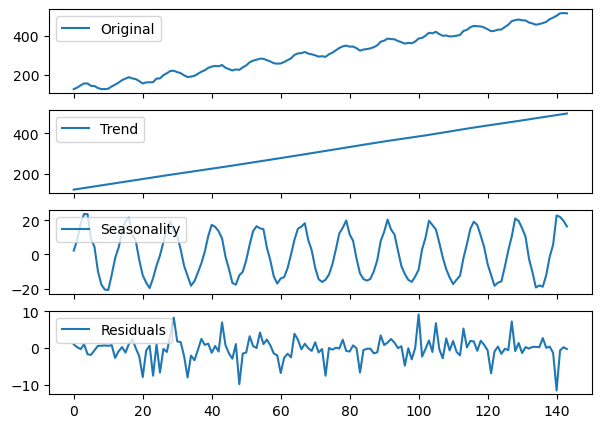

In [21]:
stl_decomposition = STL(endog=additive, period=12, robust=True).fit()
seas_decomp_plots(additive, stl_decomposition)

- The STL decomposition does a very good job on the `additive` time series.
- Next, we try with the `multiplicative` one.

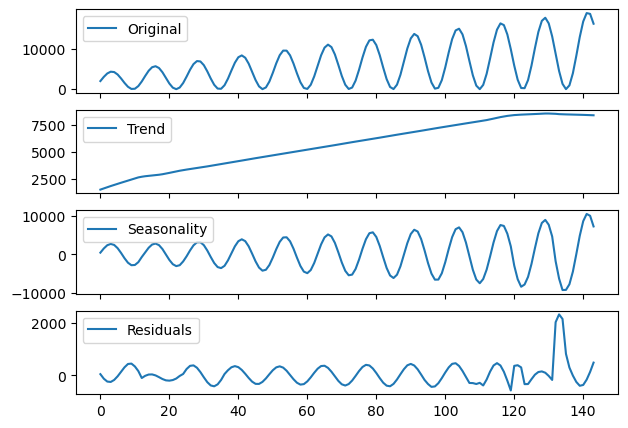

In [22]:
stl_decomposition = STL(endog=multiplicative, period=12, robust=True).fit()
seas_decomp_plots(multiplicative, stl_decomposition)

- This decomposition is not as good as the previous one.

### Which method to use?

Use ``seasonal_decompose`` when:

- Your time series data has a clear and stable seasonal pattern and trend.
- You prefer a simpler model with fewer parameters to adjust.
- The seasonal amplitude is constant over time (suggesting an additive model) or varies proportionally with the trend (suggesting a multiplicative model).

Use ``STL`` when:

- Your time series exhibits complex seasonality that may change over time.
- You need to handle outliers effectively without them distorting the trend and seasonal components.
- You are dealing with non-linear trends and seasonality, and you need more control over the decomposition process.

---

## Identify the dominant period/frequency

- ``seasonal_decompose`` expects the dominant period as a parameter. 
- In this example, we generated the ``seasonal`` component by hand as follows:

````python
seasonal = 20 + np.sin( time * 0.5) * 20
````

- We said that the period was *approximately* $12$.
- But, in general, how do we find it out 🤔?

- You can use one of the following techniques:
    - Plot the data and try to figure out after how many steps the cycle repeats.
    - Do an Autocorrelation Plot (more on this later).
    - Use the Fast Fourier Transform on a signal *without* trend.

- We will look more into FFT later on.
- For now, you can use the following function to compute the dominant period in the data.

In [23]:
def fft_analysis(signal):
    
    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept 
    detrended = signal - trend 
    
    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    
    return dominant_period, positive_frequencies, magnitudes

In [24]:
period, freqs, magnitudes = fft_analysis(seasonal)

Dominant Frequency: 0.076
Dominant Period: 13.09 time units


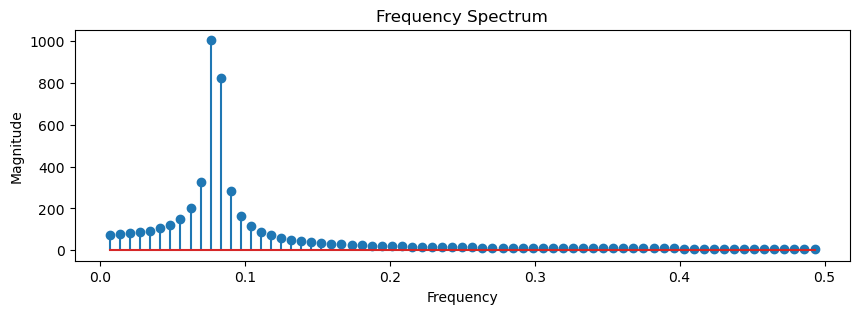

In [25]:
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

- It turns out that the main seasonality was not exactly $12$.
- If we want to generate a periodic signal with seasonality $12$, we have to do as follows.

In [26]:
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20

In [27]:
fft_analysis(seasonal_12);

Dominant Frequency: 0.083
Dominant Period: 12.00 time units



---

## Summary

In this lecture we covered the following topics.
- The definition of a time series and examples of time series from the real world.
- The definition of time series analysis and examples of its application in different fields.
- A practical understanding of the three components of time series data.
- The additive, multiplicative, and pseudo-additive models.
- Standard approaches to decompose a time series in its constituent parts.

---

## Exercises


### Exercise 1

- Consider as the seasonal component the periodic signal with period 12
```python
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
```
- Use `seasonal_12` and the `trend` and `residual` components below to define and plot the additive and the multiplicative models
```python
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))
```
- Perform the seasonal decomposition with `seasonal_decompose` and `STL` on the new signals and compare the results with the ones obtained in class, where we used an approximate period.

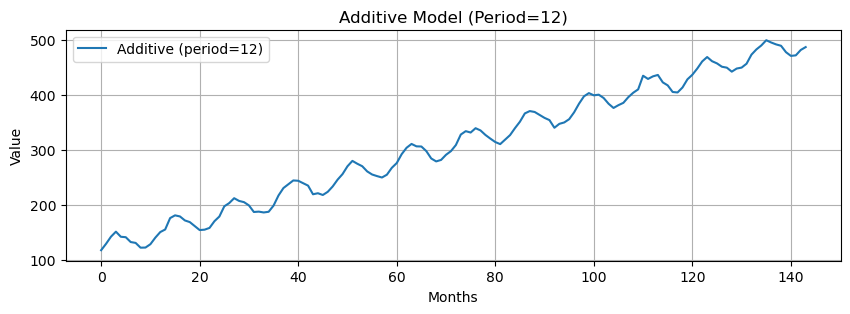

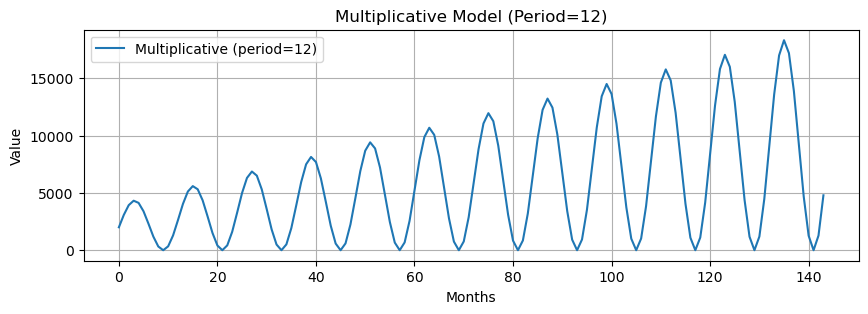

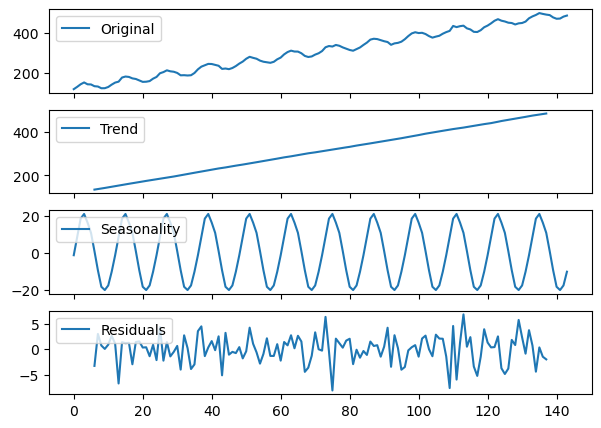

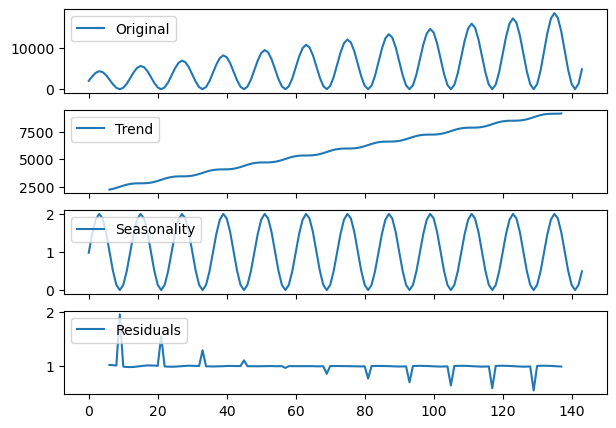

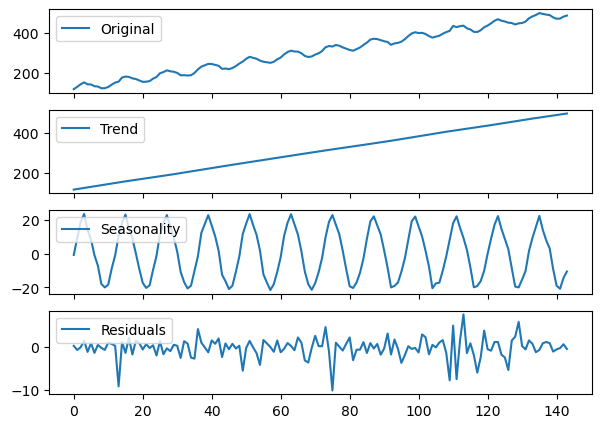

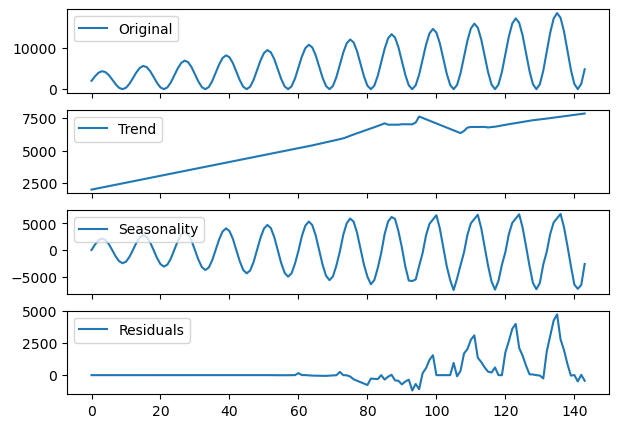

In [35]:
# Define components
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

# Additive and multiplicative models
additive_12 = trend + seasonal_12 + residuals
multiplicative_12 = trend * seasonal_12

# Ensure multiplicative_12 is strictly positive
if np.any(multiplicative_12 <= 0):
    multiplicative_12 = multiplicative_12 - np.min(multiplicative_12) + 1

# Plot additive model
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, additive_12, label='Additive (period=12)')
ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Additive Model (Period=12)")
plt.grid()
plt.legend()
plt.show()

# Plot multiplicative model
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, multiplicative_12, label='Multiplicative (period=12)')
ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Multiplicative Model (Period=12)")
plt.grid()
plt.legend()
plt.show()

# Decomposition with seasonal_decompose
add_decomp_12 = seasonal_decompose(additive_12, model='additive', period=12)
seas_decomp_plots(additive_12, add_decomp_12)

mult_decomp_12 = seasonal_decompose(multiplicative_12, model='multiplicative', period=12)
seas_decomp_plots(multiplicative_12, mult_decomp_12)

# STL decomposition
stl_add_12 = STL(endog=additive_12, period=12, robust=True).fit()
seas_decomp_plots(additive_12, stl_add_12)

stl_mult_12 = STL(endog=multiplicative_12, period=12, robust=True).fit()
seas_decomp_plots(multiplicative_12, stl_mult_12)

### Exercise 2
Load the two different time series as follows.
```python
import statsmodels.api as sm
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(len(ts_B))
```
- Plot the two time series.
- Determine if the time series looks additive or multiplicative models.
- Determine the main period of the seasonal component in the two time series.

Length of ts_A (AirPassengers): 144
Length of ts_B (CO2): 468


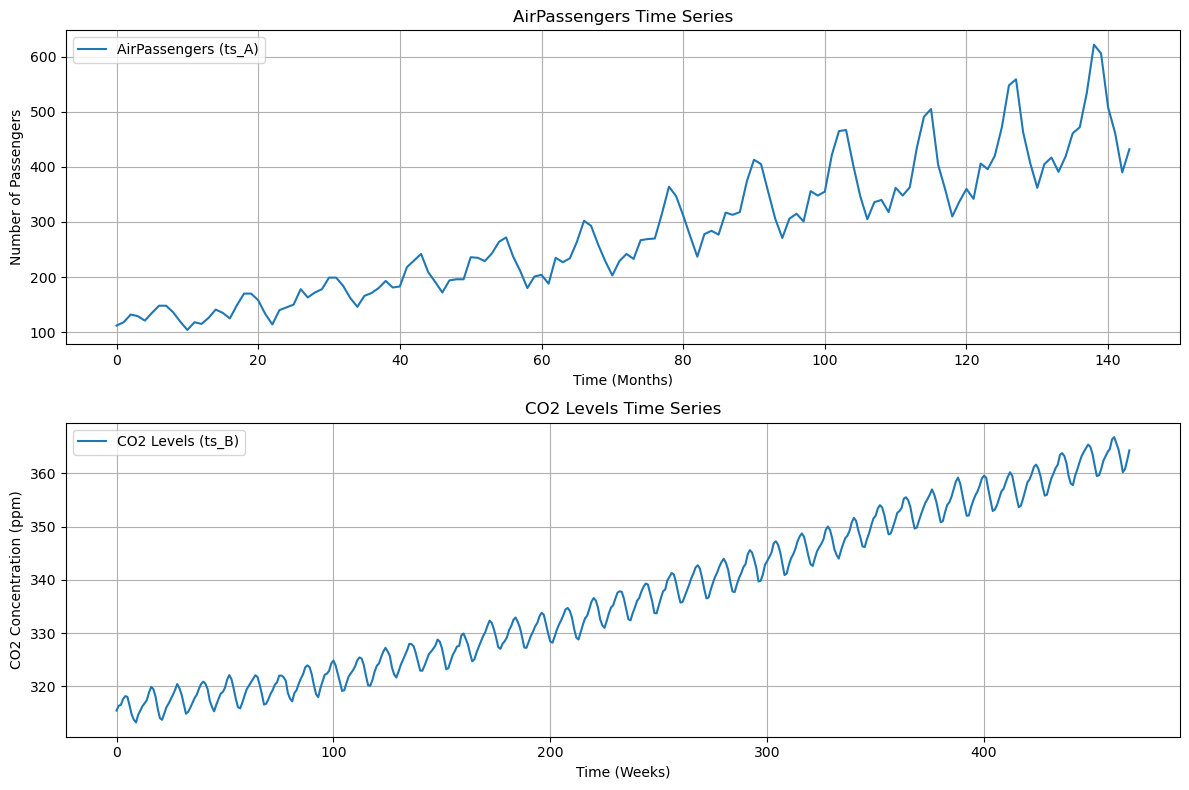

In [36]:
# Load the datasets
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(f"Length of ts_A (AirPassengers): {len(ts_A)}")
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(f"Length of ts_B (CO2): {len(ts_B)}")

# Plot the two time series
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(ts_A, label='AirPassengers (ts_A)')
ax[0].set_title('AirPassengers Time Series')
ax[0].set_xlabel('Time (Months)')
ax[0].set_ylabel('Number of Passengers')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(ts_B, label='CO2 Levels (ts_B)')
ax[1].set_title('CO2 Levels Time Series')
ax[1].set_xlabel('Time (Weeks)') # CO2 data is often weekly
ax[1].set_ylabel('CO2 Concentration (ppm)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Determine if the time series looks additive or multiplicative

Visual inspection of AirPassengers suggests that the amplitude of the seasonal component increases with the trend. This is characteristic of a multiplicative model.


In [37]:
# ts_B (CO2)
# Need to handle NaNs in CO2 data before FFT analysis
ts_B_cleaned = ts_B[~np.isnan(ts_B)] # Remove NaN values for FFT
if len(ts_B_cleaned) < len(ts_B):
    print(f"Removed {len(ts_B) - len(ts_B_cleaned)} NaN values from ts_B for FFT analysis.")


Analyzing ts_B (CO2)
Visual inspection of CO2 levels shows a clear upward trend and a seasonal pattern. The amplitude of the seasonal variation appears relatively constant across the trend, suggesting an additive model or one where the multiplicative effect is not as strong as in AirPassengers.


In [38]:
# Determine the main period of the seasonal component
# Using the fft_analysis function defined earlier in the notebook

print("\n--- Determining Seasonal Periods using FFT ---")

# For ts_A (AirPassengers) - Assuming monthly data, a period of 12 is expected for yearly seasonality.
print("\nFFT Analysis for ts_A (AirPassengers):")
period_A, _, _ = fft_analysis(ts_A)
print(f"The dominant period for AirPassengers (ts_A) is approximately {period_A:.2f} time units (expected to be around 12 for monthly data with annual seasonality).")

# For ts_B (CO2) - CO2 data often has an annual cycle. If data is weekly, period would be around 52.
# The R dataset for co2 is monthly measurements.
print("\nFFT Analysis for ts_B (CO2):")
# The 'co2' dataset from R 'datasets' package is monthly average of weekly data, so it has 12 periods per year.
# However, the raw data might have missing values (NaNs) which fft_analysis might not handle directly.
# Let's use the cleaned version for FFT.
if len(ts_B_cleaned) > 1 : # Ensure there's data to analyze
    period_B, _, _ = fft_analysis(ts_B_cleaned)
    print(f"The dominant period for CO2 (ts_B) is approximately {period_B:.2f} time units (expected to be around 12 for monthly data with annual seasonality).")
else:
    print("Could not perform FFT analysis on ts_B due to insufficient data after cleaning.")


--- Determining Seasonal Periods using FFT ---

FFT Analysis for ts_A (AirPassengers):
Dominant Frequency: 0.083
Dominant Period: 12.00 time units
The dominant period for AirPassengers (ts_A) is approximately 12.00 time units (expected to be around 12 for monthly data with annual seasonality).

FFT Analysis for ts_B (CO2):
Dominant Frequency: 0.083
Dominant Period: 12.00 time units
The dominant period for CO2 (ts_B) is approximately 12.00 time units (expected to be around 12 for monthly data with annual seasonality).


### Exercise 3
- Decompose `ts_A` and `ts_B` using `seasonal_decompose` and `STL`.
- Comment on the results you obtain.
from statsmodels.tsa.seasonal import seasonal_decompose, STL

--- Decomposing ts_A (AirPassengers) ---

seasonal_decompose for ts_A (Multiplicative):


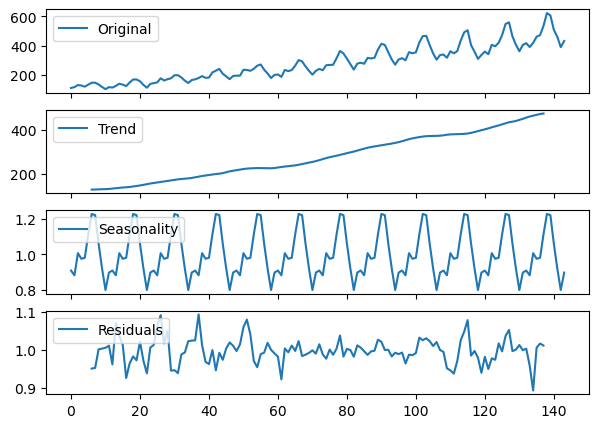


STL decomposition for ts_A:


<Figure size 640x480 with 0 Axes>

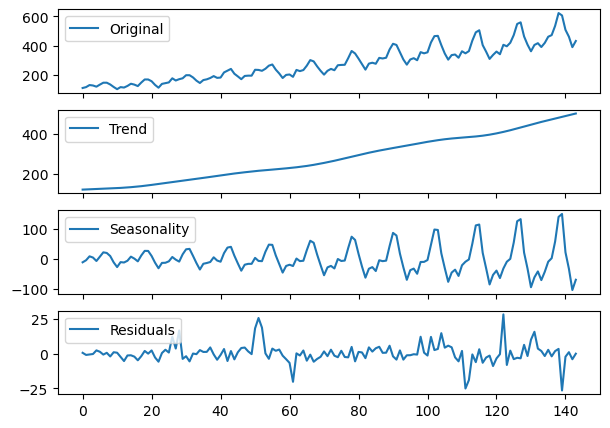


--- Decomposing ts_B (CO2) ---

seasonal_decompose for ts_B_cleaned (Additive):


<Figure size 640x480 with 0 Axes>

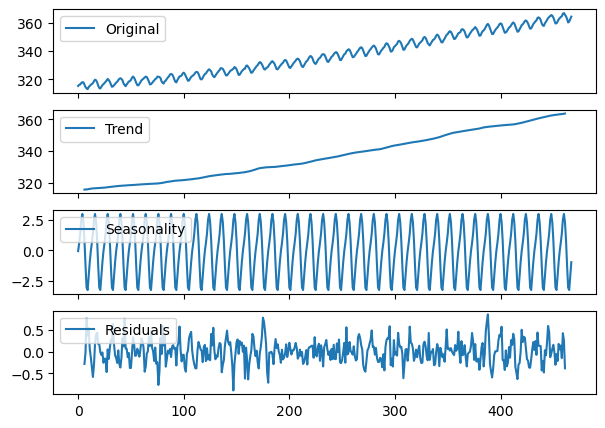


STL decomposition for ts_B_cleaned:


<Figure size 640x480 with 0 Axes>

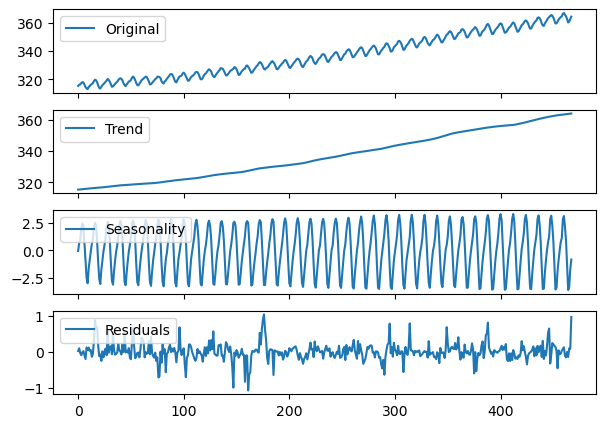

Text(0.5, 1.02, 'ts_B (CO2) - STL Decomposition')

<Figure size 640x480 with 0 Axes>

In [39]:
# From Exercise 2, period_A and period_B are expected to be 12.
# If you ran fft_analysis and got slightly different values, ensure they are integers for period.
# Forcing period to 12 as it's the known yearly seasonality for monthly data.
period_val = 12

print("--- Decomposing ts_A (AirPassengers) ---")

# seasonal_decompose for ts_A (multiplicative)
decomp_A_seasonal = seasonal_decompose(ts_A, model='multiplicative', period=period_val)
print("\nseasonal_decompose for ts_A (Multiplicative):")
seas_decomp_plots(ts_A, decomp_A_seasonal)
plt.suptitle("ts_A (AirPassengers) - seasonal_decompose (Multiplicative)", y=1.02)

# STL for ts_A
# STL is inherently additive, but can be applied directly.
# For strongly multiplicative series, log transformation before STL is common,
# but the exercise asks to apply STL directly.
stl_A = STL(ts_A, period=period_val, robust=True).fit()
print("\nSTL decomposition for ts_A:")
seas_decomp_plots(ts_A, stl_A)
plt.suptitle("ts_A (AirPassengers) - STL Decomposition", y=1.02)

print("\n--- Decomposing ts_B (CO2) ---")
# Handle NaNs in ts_B if not already done
ts_B_cleaned = ts_B[~np.isnan(ts_B)]
if len(ts_B_cleaned) < len(ts_B):
    print(f"Using cleaned ts_B (removed {len(ts_B) - len(ts_B_cleaned)} NaN values).")


# seasonal_decompose for ts_B (additive)
decomp_B_seasonal = seasonal_decompose(ts_B_cleaned, model='additive', period=period_val)
print("\nseasonal_decompose for ts_B_cleaned (Additive):")
seas_decomp_plots(ts_B_cleaned, decomp_B_seasonal)
plt.suptitle("ts_B (CO2) - seasonal_decompose (Additive)", y=1.02)

# STL for ts_B
stl_B = STL(ts_B_cleaned, period=period_val, robust=True).fit()
print("\nSTL decomposition for ts_B_cleaned:")
seas_decomp_plots(ts_B_cleaned, stl_B)
plt.suptitle("ts_B (CO2) - STL Decomposition", y=1.02)

### Comments on Results

**ts_A (AirPassengers):**
- `seasonal_decompose` (multiplicative): Captures the increasing amplitude of seasonality well, as expected for a multiplicative model. The trend is smooth. Residuals appear relatively random, though some pattern might still exist at the ends due to the moving average method used.
- `STL`: Also does a good job of capturing the upward trend and the seasonality. Because STL is robust, it might handle variations or outliers slightly differently. The seasonal component extracted by STL also shows increasing amplitude, indicating STL can adapt to such patterns to some extent even without explicit multiplicative modeling (or log transform). The residuals from STL might appear more random/stable across the series compared to `seasonal_decompose` due to its LOESS-based smoothing.

**ts_B (CO2):**
- `seasonal_decompose` (additive): Effectively separates the strong upward trend and the consistent seasonal pattern. The residuals look fairly random, fitting the additive assumption where seasonal swing doesn't depend on the trend level.
- `STL`: Provides a very similar decomposition to `seasonal_decompose` for this additive-like series. Both methods identify a clear trend and a stable seasonal component. STL's residuals might be slightly smoother or show fewer end-effects due to its more sophisticated smoothing approach. For `ts_B`, which has missing values at the beginning and end in its raw form, `seasonal_decompose` will show more missing values in its trend and residual components than STL if applied to the raw `ts_B`. Using `ts_B_cleaned` mitigates this for both.

Overall, STL is often preferred for its robustness, flexibility in seasonal smoothing, and better handling of endpoints, while `seasonal_decompose` is a simpler, more classical approach.